<a href="https://colab.research.google.com/github/IsraelAbebe/ml-algorithems-from-scratch/blob/master/applications/compare_GDA_vs_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import datasets,metrics

from keras.datasets import mnist
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
class GDA():
    def __init__(self,train_data,label_data):
        self.train_data = train_data
        self.label_data = label_data
         
    def get_phi(self,i):
        return np.sum(self.label_data==i)/len(self.label_data)
    
    def get_mui(self,i=0):
        return  np.sum((self.label_data==i)*self.train_data,axis=0)/np.sum(self.label_data==i)
    
    def get_sigma(self):
        features = len(self.train_data[0])
        sigma = np.zeros((features,features)) 
        for train,label in zip(self.train_data,self.label_data):
            values = train-self.get_mui(i=float(label))   
            values = values.reshape(-1,1)
            values[np.isnan(values)] = 0
            cov_value = values*values.T
            sigma += cov_value
                
            sigma = sigma + cov_value
        return sigma/len(self.train_data)
    
    def get_predictions(self,data):
        cov = self.get_sigma()
        det  = np.linalg.det(cov)
        classes = np.unique(self.label_data)
        
        pred = []
        for i in classes:
            phi = self.get_phi(i)
            
            if det < 1e-5:
                det = 1

            sigma_inv = np.linalg.pinv(cov)
            mui = self.get_mui(i=i)
            value = (data-mui)
            first = 1/(((2*np.pi)**(len(classes)/2))*np.sqrt(det))
            
            result = first*np.exp((-1/2)*np.dot(np.dot(value,sigma_inv),value.T))
            pred.append(result)
            
        return pred, np.argmax(pred)
    
    def evaluate(self,data,label):
        pred = []
        for i in data:
            _,p = self.get_predictions(i)
            pred.append(p)
            
        return metrics.accuracy_score(pred,label)
        

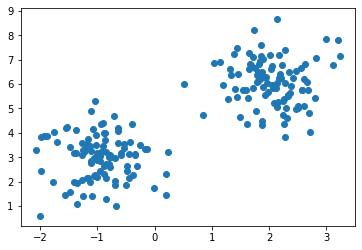

In [0]:
def generate_data(N=100):
    mu1 = -1
    mu2 = 3
    sig1 = 0.5
    sig2 = 1
    np.random.seed(10)
    x11=np.random.randn(N,1)*sig1 + mu1
    x12=np.random.randn(N,1)*sig1 + mu1+3
    x21=np.random.randn(N,1)*sig2 + mu2
    x22=np.random.randn(N,1)*sig2 + mu2+3
    c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
    x1 = np.hstack((x11,x12))
    x2 = np.hstack((x21,x22))

    X = np.hstack( (np.vstack( (x1,x2) ),c) )
    np.random.shuffle(X)
    dataset = pd.DataFrame(data=X, columns=['x','y','c'])
    
    X = np.array(dataset[['x','y']].values)
    y =  np.array(dataset['c'].values)
    y = np.where(y==-1, 0, y).reshape(-1,1)
    plt.scatter(x=x1,y=x2)
    plt.show()
    return X,y


X,y = generate_data(N=100)

In [0]:
def generate(number,num):
  gda = GDA(X,y)
  mu, sigma = gda.get_mui(number),gda.get_sigma()

  samples_array = []
  for i in range(num):
    samples = np.random.normal(mu.reshape(-1,1), np.abs(sigma), 2)
    samples_array.append(samples)

  samples_array = np.array(samples_array)

  return samples_array

In [0]:
class_one = generate(0,5000)
class_two = generate(1,5000)

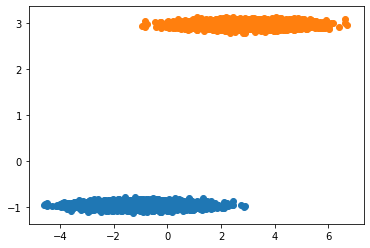

In [0]:
plt.scatter(x=class_one[:,:1],y=class_one[:,1:])
plt.scatter(x=class_two[:,:1],y=class_two[:,1:])
plt.show()

In [0]:
np.mean(class_one),np.std(class_one),np.var(class_one)

(-0.9571204171936457, 0.7586556333224173, 0.575558369971838)

In [0]:
np.mean(class_two),np.std(class_two),np.var(class_two)

(2.9706909849734076, 0.7653840662170309, 0.5858127688189163)